<a href="https://colab.research.google.com/github/phanmanhtung/Machine-Learning-and-Data-Mining-2/blob/master/Logistic_Regression_%2B_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ggcolab/'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({'length':[3,2,4,3,3.5,2,5.5,1,4.5],
                    'width':[1.5,1,1.5,1,.5,.5,1,1,1],
                    'color':[1,0,1,0,1,0,1,0,np.NaN]})
data

,length,width,color
0,3.0,1.5,1.0
1,2.0,1.0,0.0
2,4.0,1.5,1.0
3,3.0,1.0,0.0
4,3.5,0.5,1.0
5,2.0,0.5,0.0
6,5.5,1.0,1.0
7,1.0,1.0,0.0
8,4.5,1.0,NaN


[0, 6, 0, 6]

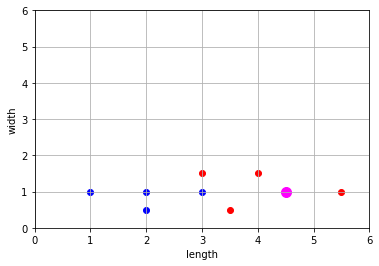

In [0]:
# Graph points
for i in range(len(data) - 1):
    if data['color'].values[i] == 1:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'r')
    elif data['color'].values[i] == 0:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'b')
        
plt.scatter(4.5, 1.0, color='magenta', s=100)
plt.grid()
plt.xlabel('length')
plt.ylabel('width')
plt.axis([0,6,0,6])

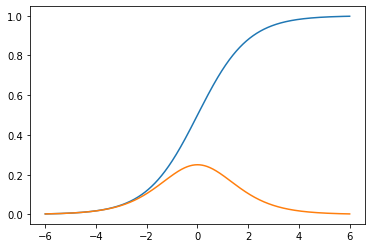

In [0]:
# Sigmoid function is used in Logistic Regression

def sigmoid(z):
    return 1/(1+np.exp(-z))
    # sigmoid = 1/(1+e^-z) (activation function)
    # cost function: (prediction - target)^2 -> (1/(1+e^(l*w1+w*w2+b)) - 1)^2

def der_sig(z):
    return sigmoid(z) - sigmoid(z) ** 2
# Plot sigmoid function:
x = np.linspace(-6,6,1000)
y = sigmoid(x)
y_der = der_sig(x)

plt.plot(x , y)
plt.plot(x, y_der)

In [0]:
# Drop the unknown data for training
data.drop([8], axis = 0, inplace=True)

In [0]:
#_____________________________________The freakin! real perceptron___________________________________________#

length_values = data["length"].values
width_values = data["width"].values
target = data["color"].values

new_target = np.where(target == 0, -1, 1)
print(new_target)

[ 1 -1  1 -1  1 -1  1 -1]


In [0]:
# The target value should be 1 and -1
print(np.sign(-1000000000000000))

-1


In [0]:
def h(l, w, w1, w2, b):
    return np.sign(l*w1 + w*w2 + b)

w1 = 0
w2 = 0
b = 0
count = 0
check = 1

while True:
  # Check whether the algorithm has converged
  if check == 0:
    break

  count += 1 
  check = 0
  for i in range(0, len(data)):
    if h(length_values[i], width_values[i], w1, w2, b) != new_target[i]:
      w1 = w1 + new_target[i]*length_values[i]
      w2 = w2 + new_target[i]*width_values[i]
      b = b + new_target[i]
      check = 1


print(w1)
print(w2)
print(b)
print("Convergence rate:", count)

8.0
1.5
-26
Convergence rate: 148


In [0]:
def which_flower(l, w):
    return h(l,w,w1,w2,b)
print("Our prediction of the problem: ", which_flower(4.5,1)) # expect to see 1

Our prediction of the problem:  1.0


(1200, 1200)
[[0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]
 [0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]
 [0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]
 ...
 [0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]
 [0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]
 [0.000e+00 5.000e-03 1.000e-02 ... 5.985e+00 5.990e+00 5.995e+00]]
(1200, 1200)
[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.000e-03 5.000e-03 5.000e-03 ... 5.000e-03 5.000e-03 5.000e-03]
 [1.000e-02 1.000e-02 1.000e-02 ... 1.000e-02 1.000e-02 1.000e-02]
 ...
 [5.985e+00 5.985e+00 5.985e+00 ... 5.985e+00 5.985e+00 5.985e+00]
 [5.990e+00 5.990e+00 5.990e+00 ... 5.990e+00 5.990e+00 5.990e+00]
 [5.995e+00 5.995e+00 5.995e+00 ... 5.995e+00 5.995e+00 5.995e+00]]
(1200, 1200)


(0.0, 5.995)

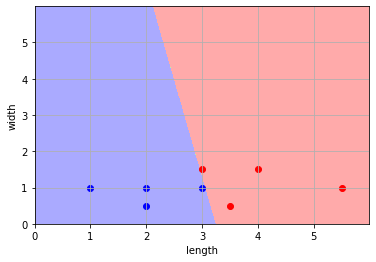

In [0]:
#MESH
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
#generate all the points in the plane using np.meshgrid(np.arange(x_min, x_min, super_small))
xx, yy = np.meshgrid(np.arange(0, 6, .005), np.arange(0, 6, .005))
Z = which_flower(xx.ravel(),yy.ravel())
Z = Z.reshape(xx.shape)

plt.figure()
# xx, yy are ALL the points in the plane, Z is the color of each area
# then plot the points using plt.scatter as usual
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

# Graph points
for i in range(len(data)):
    if data['color'].values[i] == 1:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'r')
    elif data['color'].values[i] == 0:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'b')
plt.grid()
plt.xlabel('length')
plt.ylabel('width')
plt.axis([0,6,0,6])

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#------x_min x_max y_min y_max

In [0]:
#_______________________________________LOGISTIC REGRESSION__________________________________________#

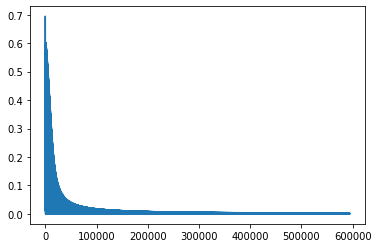

In [0]:
# The Logistric Regression

length_values = data["length"].values
width_values = data["width"].values
target = data["color"].values

def NN(l, w, w1, w2, b):
    return l*w1 + w*w2 + b
w1 = 0
w2 = 0
b = 0

# Loop through all the point, calculate the COST FUNCTION
costs = []
for j in range(100000):
  for i in range(0, len(data)-2):
    neunet = NN(length_values[i], width_values[i], w1, w2, b)
    prediction = sigmoid(neunet)

    # Cost to save the information
    cost = (prediction - target[i])**2
        
    dcost_dpred = 2 * (prediction - target[i])
    dpred_dneunet = der_sig(neunet)
                    
    dneunet_dw1 = length_values[i]
    dneunet_dw2 = width_values[i]
    dneunet_db = 1
    
    # Calculate the DERIVATIVE of COST FUNCTION w/r.t. w1, w2, b
    dcost_dw1 = dcost_dpred * dpred_dneunet * dneunet_dw1 # chain rule
    dcost_dw2 = dcost_dpred * dpred_dneunet * dneunet_dw2
    dcost_db = dcost_dpred * dpred_dneunet * dneunet_db
                    
    # Update w1, w2, w3 over time:
    w1 = w1 - 0.5*dcost_dw1 # w1_gradient
    w2 = w2 - 0.5*dcost_dw2
    b = b - 0.5*dcost_db
        
    if j % 100:
        costs.append(cost)
plt.plot(costs)

In [0]:
print(w1)
print(w2)
print(b)

def which_flower(l, w):
    return sigmoid(NN(l,w,w1,w2,b))
print("Our prediction of the problem: ", which_flower(4.5,1)) # expect to see 1

25.004077695812413
12.330900617678438
-90.2682000787493
Our prediction of the problem:  0.9999999999999991


(0.0, 5.995)

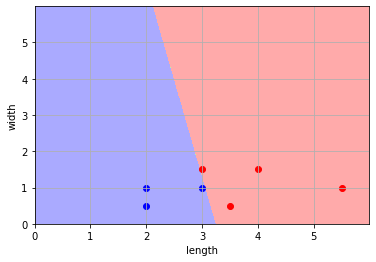

In [0]:
#MESH
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
#generate all the points in the plane using np.meshgrid(np.arange(x_min, x_min, super_small))
xx, yy = np.meshgrid(np.arange(0, 6, .005), np.arange(0, 6, .005))
Z = which_flower(xx.ravel(),yy.ravel())
Z = Z.reshape(xx.shape)

plt.figure()
# xx, yy are ALL the points in the plane, Z is the color of each area
# then plot the points using plt.scatter as usual
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

# Graph points
for i in range(len(data) - 1):
    if data['color'].values[i] == 1:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'r')
    elif data['color'].values[i] == 0:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'b')
plt.grid()
plt.xlabel('length')
plt.ylabel('width')
plt.axis([0,6,0,6])

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#------x_min x_max y_min y_max